# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as plo
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data Gathering

In [2]:
sales_train = pd.read_csv('Data/sales_train.csv', index_col='date')
items = pd.read_csv('Data/items.csv')
items_cat = pd.read_csv('Data/item_categories.csv')
shops = pd.read_csv('Data/shops.csv', index_col='shop_id')
sales_train.index = pd.to_datetime(sales_train.index, format="%d.%m.%Y")

In [3]:
sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


# Data Preprocessing

- Checking for sales_train data

In [35]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2935849 entries, 2013-01-02 to 2015-10-03
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date_block_num  int64  
 1   shop_id         int64  
 2   item_id         int64  
 3   item_price      float64
 4   item_cnt_day    float64
dtypes: float64(2), int64(3)
memory usage: 134.4 MB


In [36]:
sales_train.isna().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

- There is no NULL values and the columns are in proper dataformats

- Checking for items, items_cat and shops data

In [28]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [30]:
items_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [32]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- Dropping useless columns in sales_train dataframe

In [16]:
# sales_train = sales_train.drop(columns={
#     'date_block_num'
# }, axis=1
# )

In [17]:
sales_train.head(3)

,shop_id,item_id,item_price,item_cnt_day
date,,,,
2013-01-02,59,22154,999.0,1.0
2013-01-03,25,2552,899.0,1.0
2013-01-05,25,2552,899.0,-1.0


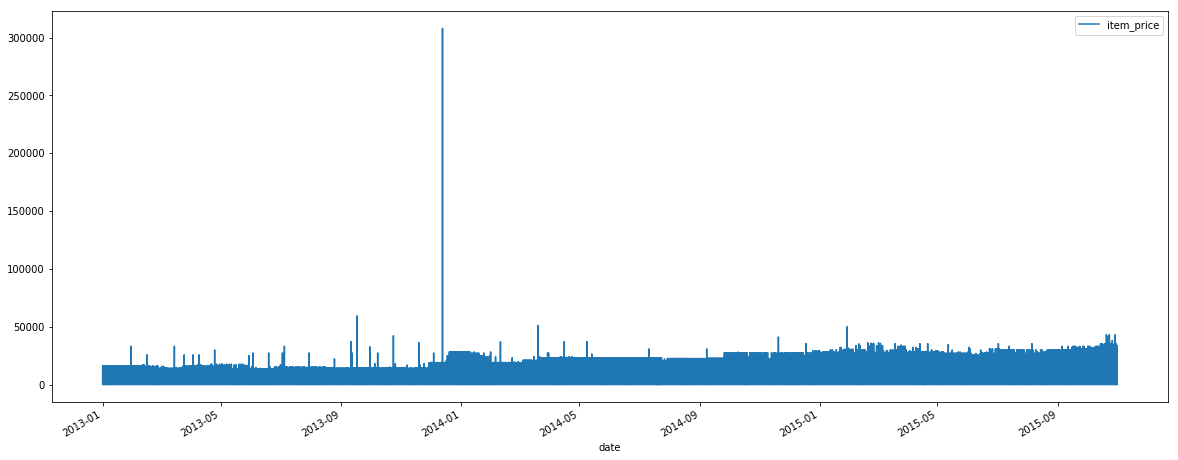

In [5]:
sales_train.loc[:,['item_price']].plot(figsize=(20,8))

In [6]:
# temp = sales_train.loc[:,['item_price']]
# data = go.Scatter(
#     x = temp.index,
#     y = temp.values,
#     mode = 'markers+lines',
#     name = 'item_price'
# )
# layout = go.Layout(
#     title = 'Item price graph',
#     template = 'plotly_dark'
# )
# fig = go.Figure(data=data, layout=layout)
# plo.iplot(fig)

In [9]:
sales_train

,shop_id,item_id,item_price,item_cnt_day
date,,,,
2013-01-02,59,22154,999.00,1.0
2013-01-03,25,2552,899.00,1.0
2013-01-05,25,2552,899.00,-1.0
2013-01-06,25,2554,1709.05,1.0
2013-01-15,25,2555,1099.00,1.0
...,...,...,...,...
2015-10-10,25,7409,299.00,1.0
2015-10-09,25,7460,299.00,1.0
2015-10-14,25,7459,349.00,1.0


In [7]:
sales_train.reset_index().groupby(by=['date_block_num','shop_id','item_id']).mean()

item_price  item_cnt_day
date_block_num shop_id item_id                          
0              0       32            221.0           1.5
                       33            347.0           1.0
                       35            247.0           1.0
                       43            221.0           1.0
                       51            128.5           1.0
...                                    ...           ...
33             59      22087         119.0           2.0
                       22088         119.0           1.0
                       22091         179.0           1.0
                       22100         629.0           1.0
                       22102        1250.0           1.0

[1609124 rows x 2 columns]

In [8]:
aa = sales_train.groupby(by=['date_block_num','shop_id','item_id']).agg(
    {
        "item_price" : ['mean'],
        "item_cnt_day" : ['sum']
    }
)
aa.head()

item_price item_cnt_day
                                     mean          sum
date_block_num shop_id item_id                        
0              0       32           221.0          6.0
                       33           347.0          3.0
                       35           247.0          1.0
                       43           221.0          1.0
                       51           128.5          2.0

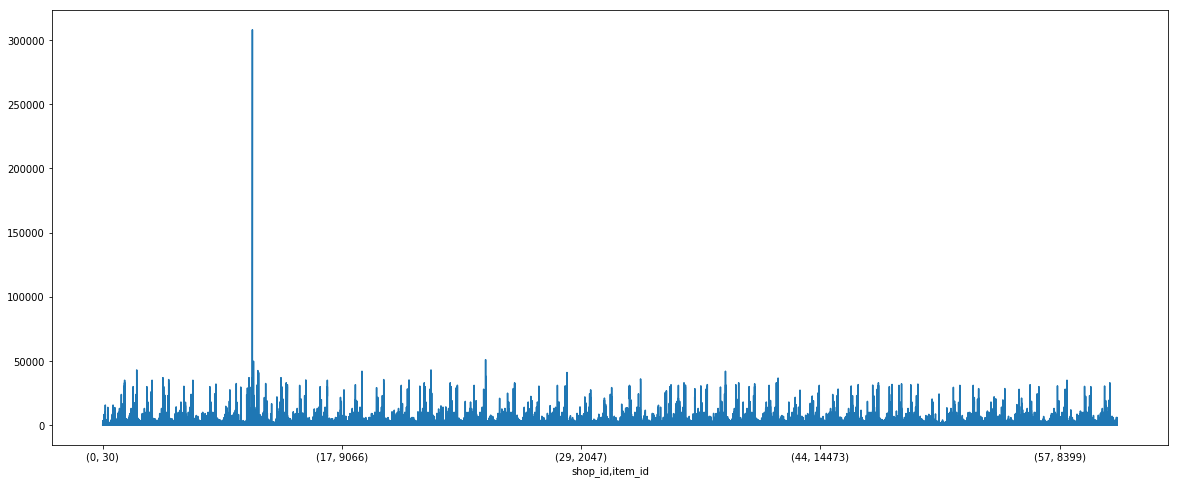

In [8]:
aa.loc[:,'item_price'].plot(figsize=(20,8))

In [12]:
sales_train.groupby(by=['item_id','shop_id']).mean()

item_price  item_cnt_day
item_id shop_id                          
0       54             58.0           1.0
1       55           4490.0           1.0
2       54             58.0           1.0
3       54             79.0           1.0
4       54             58.0           1.0
...                     ...           ...
22168   12            799.0           1.0
        16            799.0           1.0
        42            799.0           1.0
        43            798.5           1.0
22169   25           4349.0           1.0

[424124 rows x 2 columns]

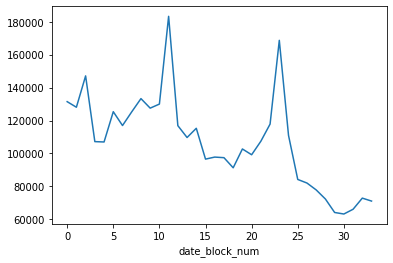

In [5]:
ts = sales_train.groupby(['date_block_num'])['item_cnt_day'].sum()
ts.plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

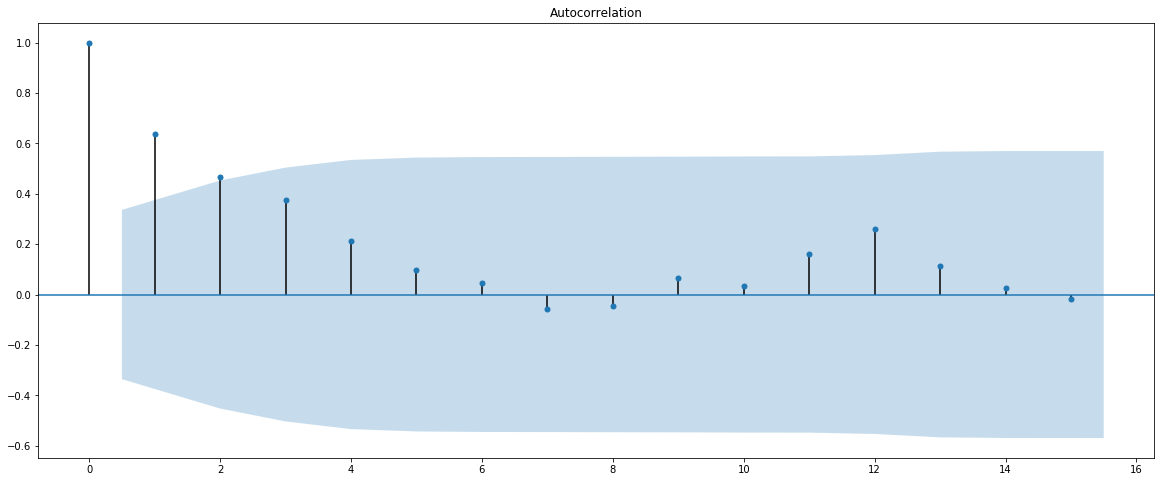

In [9]:
fig,ax = plt.subplots(figsize=(20,8))
plot_acf(ts, ax = ax,lags=15);

In [23]:
mm = sales_train.groupby(['date'])['item_cnt_day'].sum()

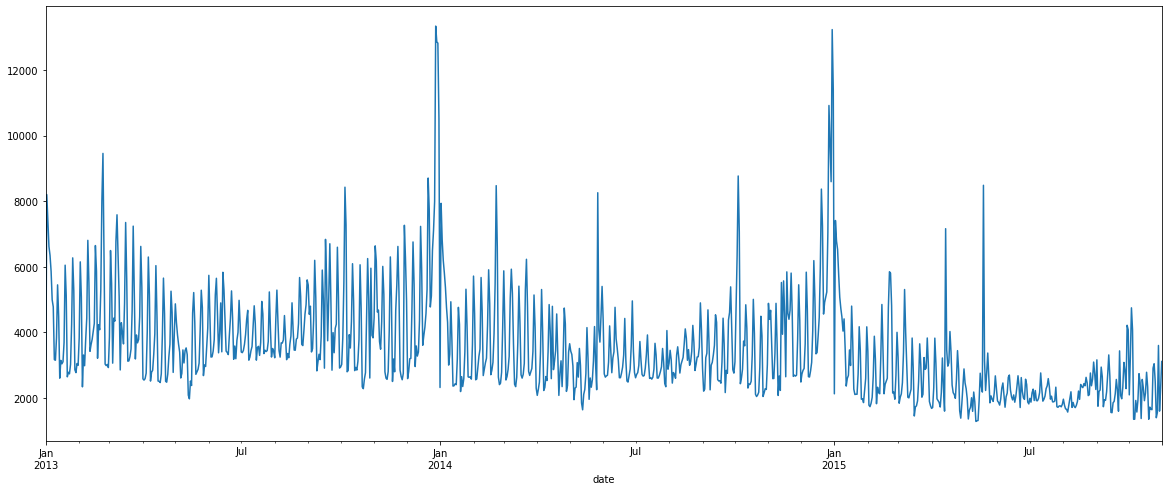

In [40]:
mm.plot(figsize=(20,8))

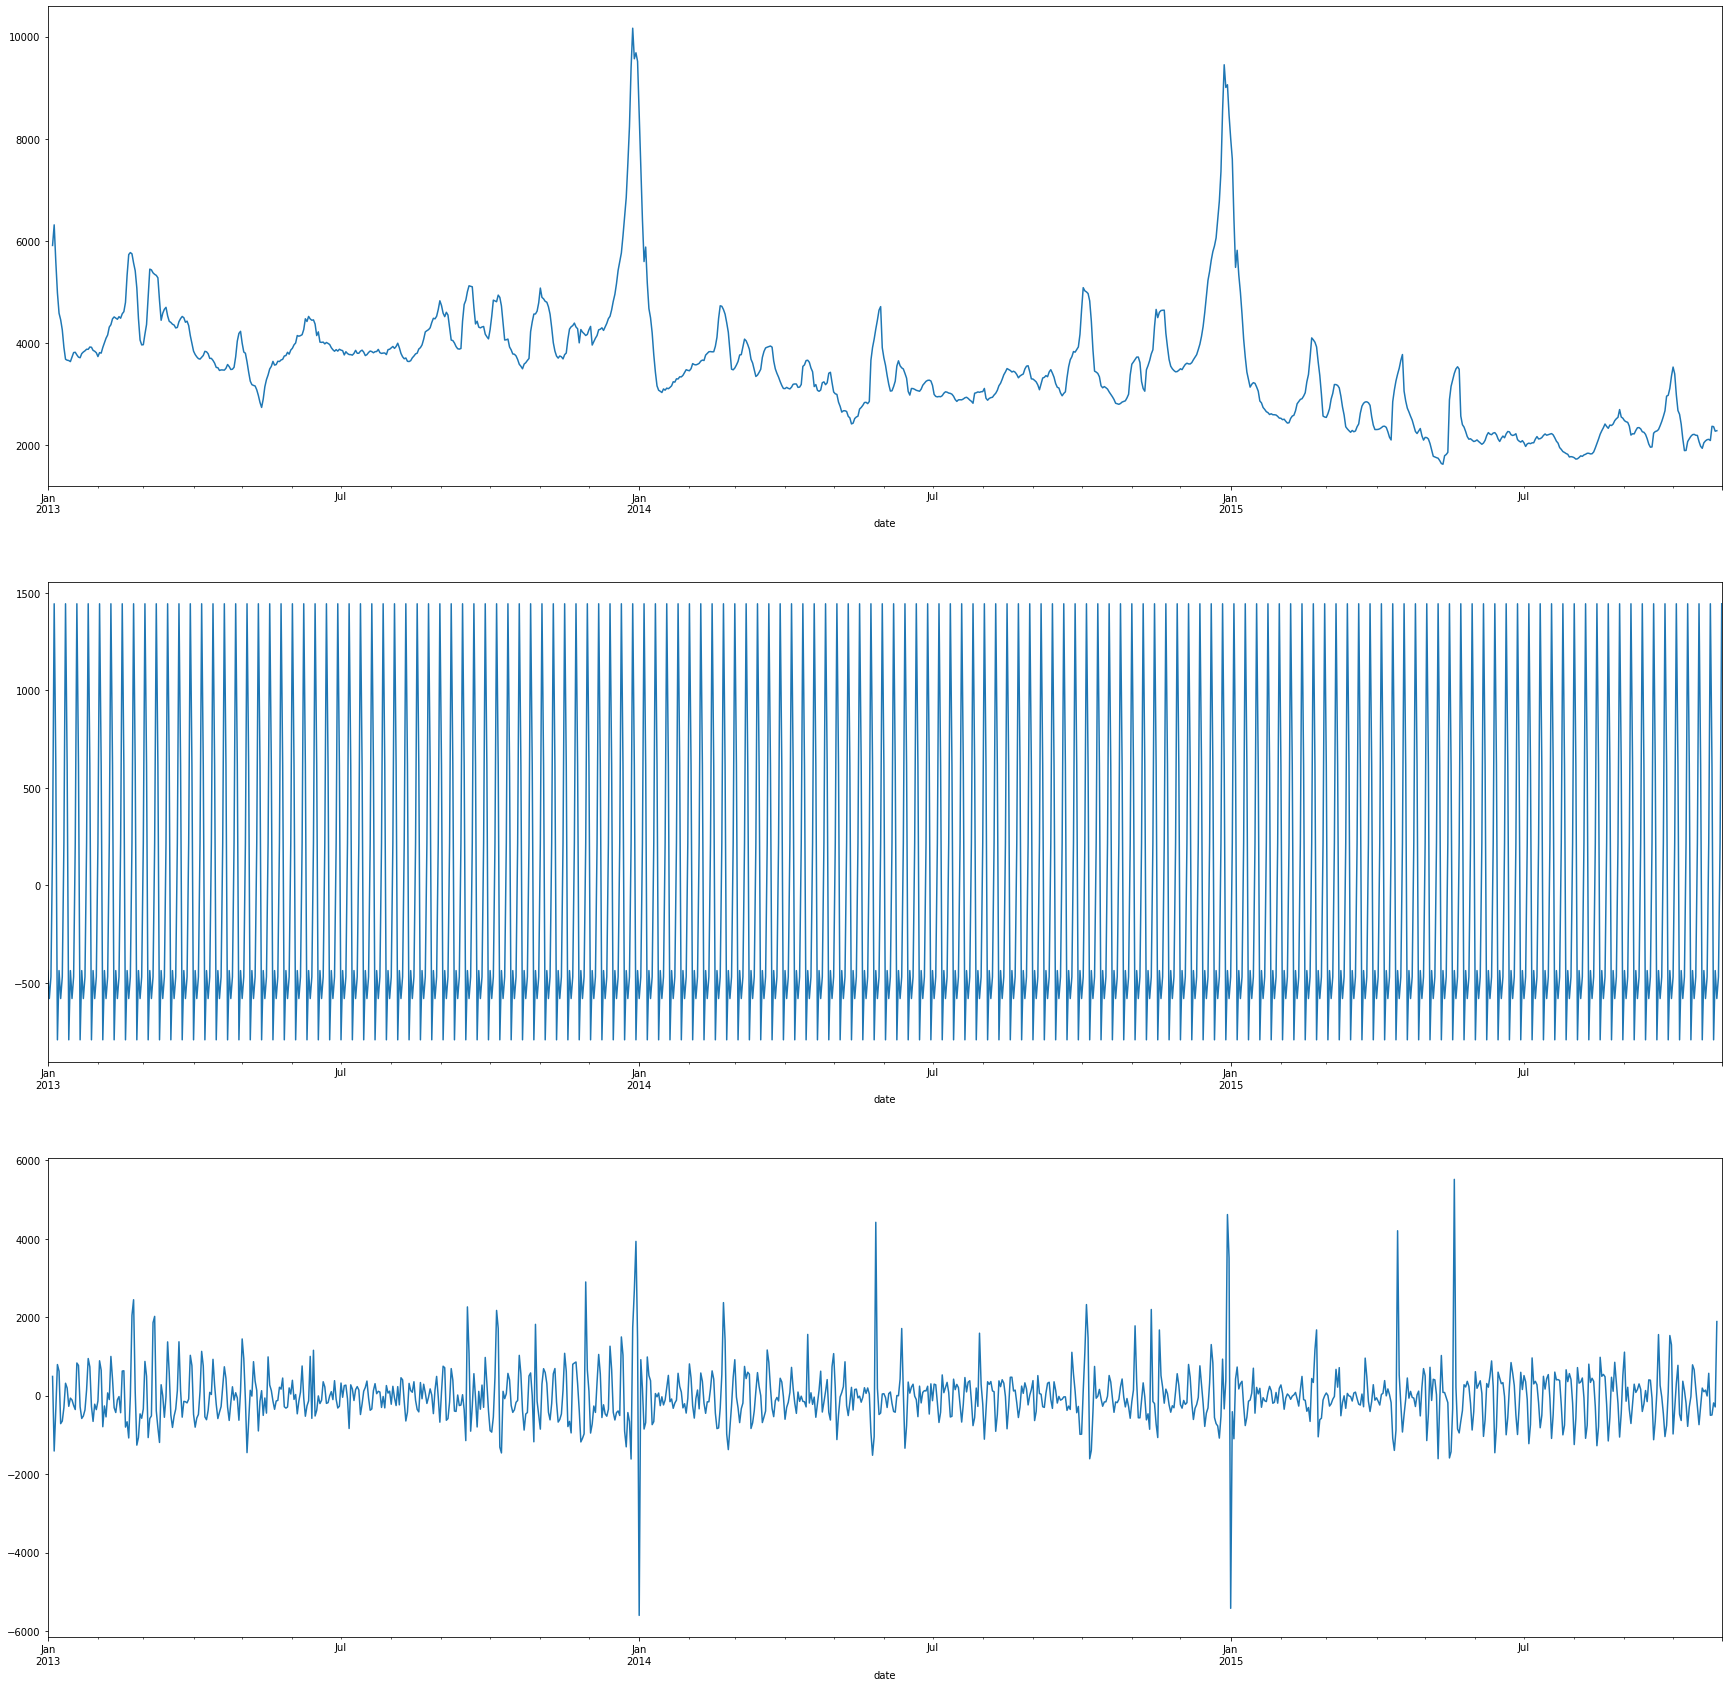

In [38]:
m = seasonal_decompose(mm)
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(30,30))
m.trend.plot(ax=ax1)
m.seasonal.plot(ax=ax2)
m.resid.plot(ax=ax3)

In [6]:
sales_train

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...
2015-10-10,33,25,7409,299.00,1.0
2015-10-09,33,25,7460,299.00,1.0
2015-10-14,33,25,7459,349.00,1.0
